<a href="https://colab.research.google.com/github/devroopsaha744/MLCOE-TASK-2/blob/main/MLCOE_task_2_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df =pd.read_csv("/content/50_Startups.csv")

## **Data Collection and Cleaning**

In [89]:
df = pd.read_csv("/content/50_Startups.csv")

In [90]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [91]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [92]:
df.shape

(50, 5)

In [93]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [94]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [95]:
#Imputing the missing values
df['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df['Administration'] = df['Administration'].fillna(df['Administration'].mean())

In [96]:
#Checking if all the missing values are imputed
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## **Exploratory Data Analysis**

<ipython-input-97-4aad47258372>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=75)
<ipython-input-97-4aad47258372>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=75)
<ipython-input-97-4aad47258372>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_xticklabels(axes[2][0].get_xticklabels(), rotation=75)


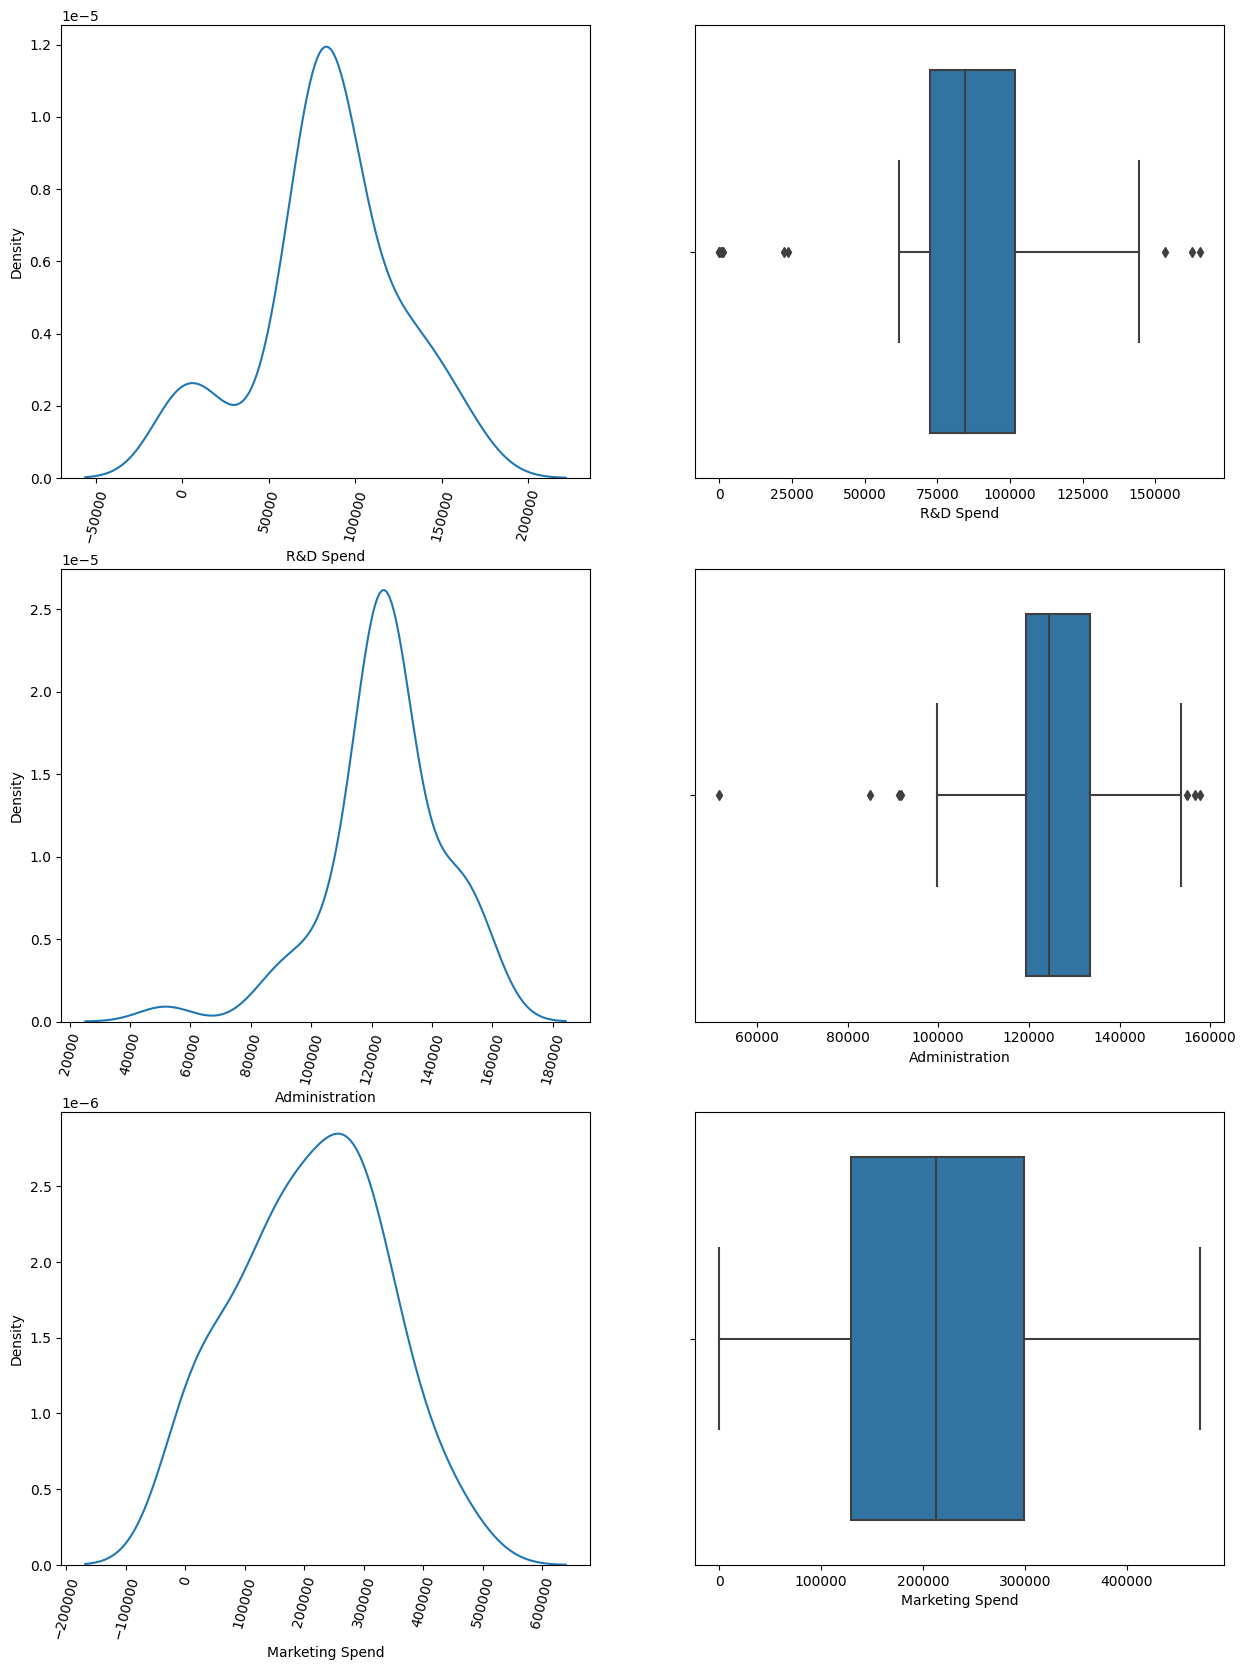

In [97]:
fig, axes = plt.subplots(3,2, figsize = (15,20))

sns.kdeplot(x = 'R&D Spend', data = df, ax = axes[0][0])
sns.boxplot(x = 'R&D Spend', data = df, ax = axes[0][1])
sns.kdeplot(x = 'Administration', data = df, ax = axes[1][0])
sns.boxplot(x = 'Administration', data = df, ax = axes[1][1])
sns.kdeplot(x = 'Marketing Spend', data = df, ax = axes[2][0])
sns.boxplot(x = 'Marketing Spend', data = df, ax = axes[2][1])
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=75)
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=75)
axes[2][0].set_xticklabels(axes[2][0].get_xticklabels(), rotation=75)

plt.show()

1. The freq distribution of Marketing spend is almost normal.
2. No outliers are present in the Marketing spend column
3. Outliers are present in the columns 'R&D spend' and 'Administration'

In [98]:
#Detection and removal of outliers
df.quantile(q=0.25)

<ipython-input-98-585c5a354875>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(q=0.25)


R&D Spend           72579.3400
Administration     119403.2750
Marketing Spend    129300.1325
Profit              90138.9025
Name: 0.25, dtype: float64

In [99]:
df.quantile(q=0.75)

<ipython-input-99-ed71fc525305>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(q=0.75)


R&D Spend          101602.8000
Administration     133536.3275
Marketing Spend    299469.0850
Profit             139765.9775
Name: 0.75, dtype: float64

In [100]:
iqr1 =  101602.8000 - 72579.3400  #For R&D spend col
iqr2 =  133536.3275 -  119403.2750  #For Administration Column

#For the  R&D spend column
l1 =  72579.3400 - 1.5*iqr1
u1 =  101602.8000 + 1.5*iqr1

#For the Administration Column
l2 =  119403.2750 - 1.5*iqr2
u2 =  133536.3275+ 1.5*iqr2

In [101]:
#Capping the outliers
df['R&D Spend'] = np.where(df['R&D Spend']>u1,u1, np.where(df['R&D Spend']<l1,l1,df['R&D Spend']))
df['Administration'] = np.where(df['Administration']>u2,u2, np.where(df['Administration']<l2,l2,df['Administration']))

<ipython-input-102-dcd2ce2b6d88>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

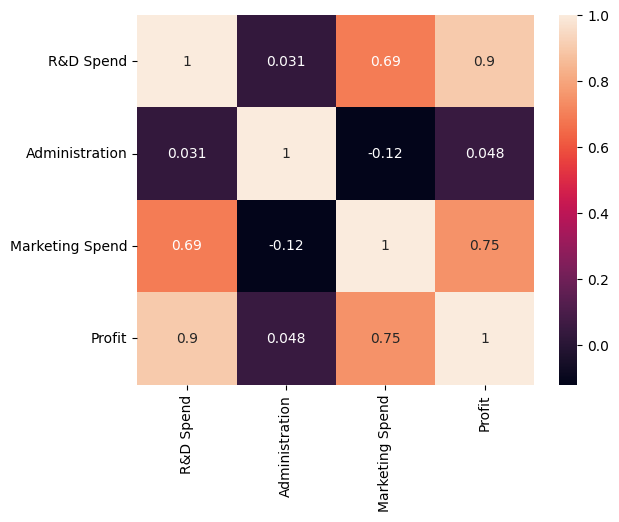

In [102]:
#Understanding the correaltions
corr = df.corr()
sns.heatmap(corr, annot = True)

1. Marketing spend Column and R&D spend are highly correlated with the target  Variable Profit.
2. Poor correaltion between Administration and Porift Column
3. Significant correlation between Marketing Spend and R&D spend column.


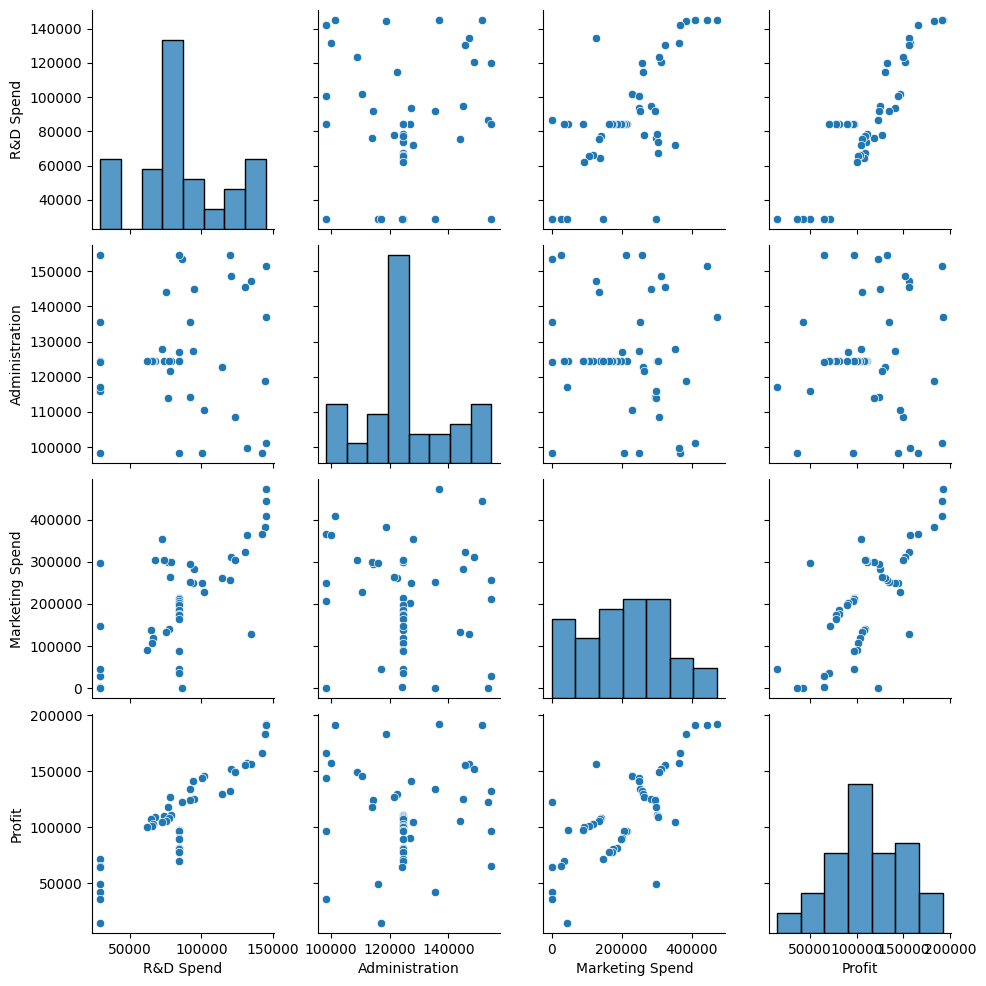

In [103]:
#Visualizing correlations using pairplot
sns.pairplot(df)

In [104]:
#Analysing the states column
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

No class imbalance

In [105]:
st= df.groupby('State')['Profit'].mean().reset_index()

In [106]:
st

,State,Profit
0,California,103905.175294
1,Florida,118774.024375
2,New York,113756.446471


1.Profits from Florida are hgiher on an average than other two states.

## **Preprocessing**

In [107]:
df =pd.get_dummies(df)
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,145137.990000,136897.80000,471784.10,192261.83,0,0,1
1,145137.990000,151377.59000,443898.53,191792.06,1,0,0
2,145137.990000,101145.55000,407934.54,191050.39,0,1,0
3,144372.410000,118671.85000,383199.62,182901.99,0,0,1
4,142107.340000,98203.69625,366168.42,166187.94,0,1,0
5,131876.900000,99814.71000,362861.36,156991.12,0,0,1
6,134615.460000,147198.87000,127716.82,156122.51,1,0,0
7,130298.130000,145530.06000,323876.68,155752.60,0,1,0
8,120542.520000,148718.95000,311613.29,152211.77,0,0,1
9,123334.880000,108679.17000,304981.62,149759.96,1,0,0


In [108]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl_df =scl.fit_transform(df)
scl_df = pd.DataFrame(scl_df, columns = df.columns)

In [109]:
scl_df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,1.000000,0.684461,1.000000,1.000000,0.0,0.0,1.0
1,1.000000,0.940595,0.940893,0.997355,1.0,0.0,0.0
2,1.000000,0.052039,0.864664,0.993178,0.0,1.0,0.0
3,0.993406,0.362062,0.812235,0.947292,0.0,0.0,1.0
4,0.973895,0.000000,0.776136,0.853171,0.0,1.0,0.0
5,0.885773,0.028497,0.769126,0.801382,0.0,0.0,1.0
6,0.909362,0.866677,0.270710,0.796490,1.0,0.0,0.0
7,0.872174,0.837158,0.686493,0.794407,0.0,1.0,0.0
8,0.788141,0.893566,0.660500,0.774468,0.0,0.0,1.0
9,0.812194,0.185301,0.646443,0.760661,1.0,0.0,0.0


In [110]:
#feature selection
scl_df= scl_df.drop(['Administration'], axis =1)

#I have dropped the Adiministration feature as it is useless (poor correlation with target variable)

## **Model developement**

In [111]:
#Splitting target variable and other columns
x = scl_df.drop(['Profit'], axis =1)
y = scl_df['Profit']

In [112]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [113]:
#implementing Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [114]:
actual_pred = pd.DataFrame({"Actual_values":y_test, "Predicted_values":y_pred})
actual_pred.sample(10)

,Actual_values,Predicted_values
47,0.156990,0.166245
23,0.529634,0.477321
17,0.623317,0.627790
46,0.196020,0.290359
10,0.740175,0.601856
30,0.480099,0.340926
26,0.512737,0.426444
15,0.648921,0.711544
25,0.522146,0.406702
2,0.993178,0.899498


In [115]:
#Testing the model
print("The model score is: ", reg.score(x,y)*100)

from sklearn.metrics import r2_score, mean_absolute_error
print("The r2 score is: ",r2_score(y_test, y_pred))
print("The Mean absolute error is : ", mean_absolute_error(y_test, y_pred))

The model score is:  83.81760693223272
The r2 score is:  0.8665786527074071
The Mean absolute error is :  0.07352529139988742
